In [34]:
import numpy
import scipy.special
from matplotlib import pyplot as plt
class neuralNetwork:
    
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.activation_function = lambda x : scipy.special.expit(x)
        pass
    def train(self,inputs_list,targets_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets = numpy.array(targets_list,ndmin=2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs= numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        outputs_error = targets - final_outputs
        hidden_error = numpy.dot(self.who.T,outputs_error)
        self.who += self.lr * numpy.dot((outputs_error*final_outputs * (1.0-final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_error*hidden_outputs * (1.0-hidden_outputs)), numpy.transpose(inputs))
        pass
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_inputs
        pass
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
data_file = open("/Users/kimtaemin/Desktop/디스코드봇/discordbot/mnist_dataset/train.csv",'r')
data_list = data_file.readlines()
data_file.close()
for record in data_list:
    all_values = data_list[0].split(',')
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) +0.01
    targets = numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass


In [7]:
len(data_list)

100

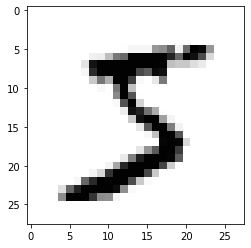

In [25]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap="Greys",interpolation='None')

scaled_input = (numpy.asfarry(all_values[1:])/255.0 * 0.99) +0.01
print(scaled_input)

In [27]:
scaled_input = (numpy.asfarray(all_values[1:])/255.0 * 0.99) +0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [28]:
onodes = 10
targets = numpy.zeros(onodes)+0.01
targets[int(all_values[0])] = 0.99
        

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-28-30d3de0a2f4e>, line 3)

In [30]:
print(all_values[1:])

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '18', '18', '18', '126', '136', '175', '26', '166', '255', '247', '127', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '30', '36', '94', '154', '170', '253', '253', '253', '253', '253', '225', '172', '253', '242', '195',

In [35]:
test_data = open("/Users/kimtaemin/Desktop/디스코드봇/discordbot/mnist_dataset/train.csv",'r')
test_list = test_data.readlines()
test_data.close()